# Module 5 Bayesian Inference

In [7]:
# !pip3 install pymc3

In [2]:
import numpy as np
import pandas as pd

x = np.linspace(-5, 5, 20)
y = -5 + 3*x + 4*np.random.normal(size=x.shape)
data = pd.DataFrame({'x': x, 'y': y})

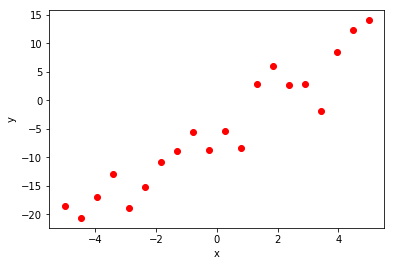

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'or')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
import pymc3 as pm

In [5]:
with pm.Model():
    
    # prior info
    intercept = pm.Uniform('intercept',-10,10)
    print(intercept)
    slope = pm.Uniform('slope',1,5)
    print(slope)
    
    # likelihood
    obs = pm.Normal('y', 
                   mu = intercept+slope*x,
                   sd = 1,
                   observed = y)
    
    trace = pm.sample(10000)

intercept
slope


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:07<00:00, 2727.10draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11990ba58>,
      dtype=object)

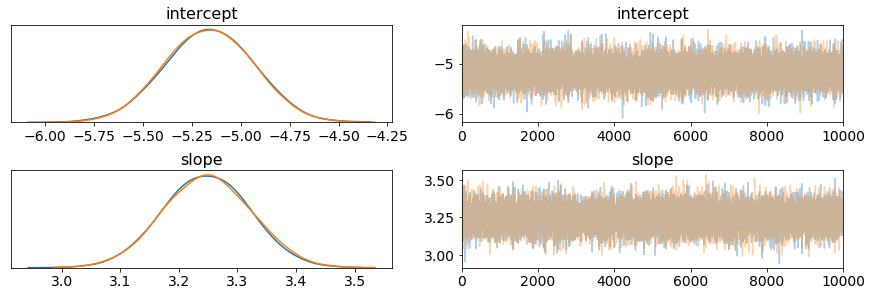

In [6]:
pm.traceplot(trace)

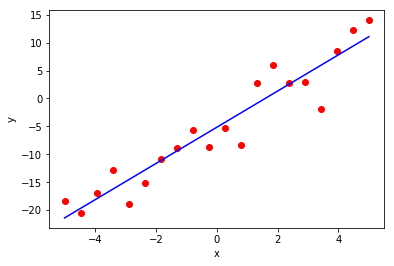

In [7]:
a = trace['intercept'].mean()
b = trace['slope'].mean()

yhat = a + b*x

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'or')
plt.plot(x,yhat,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Ex: Bayes' Inference

In [8]:
import pandas as pd
mtcars = pd.read_csv('./data/mtcars.csv')

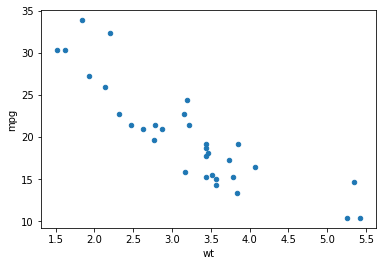

In [9]:
mtcars.plot.scatter('wt','mpg')

In [10]:
with pm.Model():
    intercept = pm.Uniform('intercept',30,40)
    slope = pm.Uniform('slope',-10,-2)
    
    mpg_ = pm.Normal('mpg_',
                       mu = intercept + slope*mtcars.wt,
                       sd = 1,
                       observed = mtcars.mpg)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:15<00:00, 1327.90draws/s]
The acceptance probability does not match the target. It is 0.8906353061738409, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f02f9b0>,
      dtype=object)

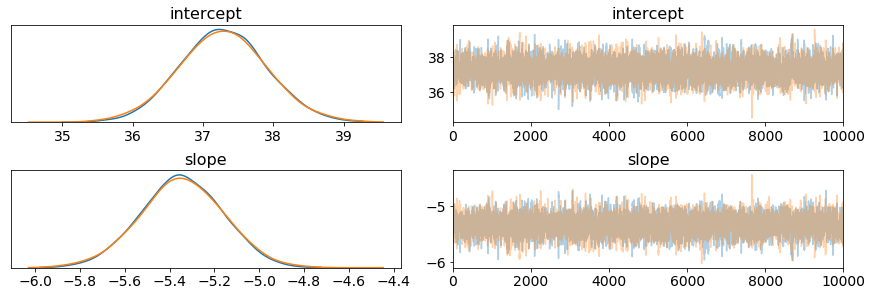

In [11]:
pm.traceplot(trace)

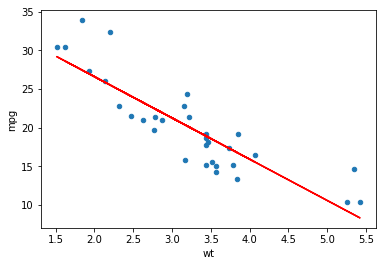

In [12]:
a = trace['intercept'].mean()
b = trace['slope'].mean()

yhat = a + b*mtcars.wt
mtcars.plot.scatter('wt','mpg')
plt.plot(mtcars.wt,yhat,'r')

In [13]:
data = pd.read_csv('data/college.csv')
column_name = 'region'
data.head()

,id,name,city,state,region,highest_degree,control,gender,admission_rate,sat_avg,undergrads,tuition,faculty_salary_avg,loan_default_rate,median_debt,lon,lat
0,102669,Alaska Pacific University,Anchorage,AK,West,Graduate,Private,CoEd,0.4207,1054,275,19610,5804,0.077,23250.0,-149.900278,61.218056
1,101648,Marion Military Institute,Marion,AL,South,Associate,Public,CoEd,0.6139,1055,433,8778,5916,0.136,11500.0,-87.319165,32.632354
2,100830,Auburn University at Montgomery,Montgomery,AL,South,Graduate,Public,CoEd,0.8017,1009,4304,9080,7255,0.106,21335.0,-86.299969,32.366805
3,101879,University of North Alabama,Florence,AL,South,Graduate,Public,CoEd,0.6788,1029,5485,7412,7424,0.111,21500.0,-87.677251,34.799810
4,100858,Auburn University,Auburn,AL,South,Graduate,Public,CoEd,0.8347,1215,20514,10200,9487,0.045,21831.0,-85.480782,32.609857


In [14]:
temp = data['region'].value_counts()
temp

South        459
Midwest      353
Northeast    299
West         158
Name: region, dtype: int64

In [15]:
temp = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
temp

,labels,values
0,South,459
1,Midwest,353
2,Northeast,299
3,West,158


In [16]:
values = temp['values']
labels = temp['labels']

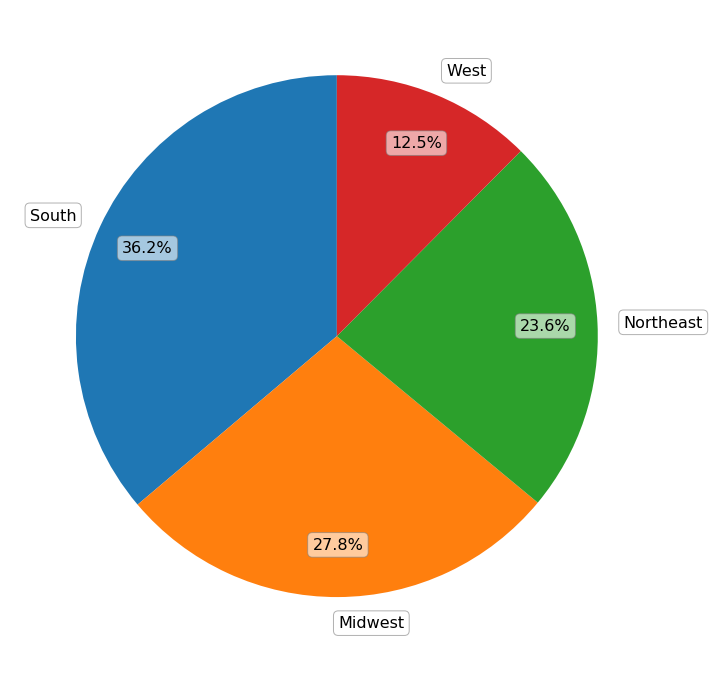

In [17]:
fig = plt.figure(figsize=(12, 12), facecolor='w')
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.6)
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance = 0.8,
    textprops={'fontsize': 16, 'bbox': bbox_props})
fig.savefig('pie', dpi=200, bbox_inches="tight")

In [18]:
temp.to_excel("temp.xlsx")